# Exploratory Data Analysis

This notebook explores data using a dataset extracted from [Telco Customer Churn on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). Each row represents a customer, and each column contains the customer's attributes as described in the metadata. The raw dataset consists of 7,043 rows (customers) and 21 columns (features). There are no null or blank values in the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/telco_customer_churn.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


| Column | Description |
| --- | --- |
| customerID | Customer identification |
| gender | Customer gender (Male, Female) |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer's internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | Customer's contract (Monthly, Annual, Biennial) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | Customer's monthly charges |
| TotalCharges | Customer's total charges |
| Churn | Whether the customer has churned or not (Yes, No) |

For this analysis, a new column was created to classify whether the customer subscribed to one service (Phone and Internet) or both services.

In [4]:
df['Service'] = None
df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] == 'No'), 'Service'] = "Just Phone"
df.loc[(df['PhoneService'] == 'No') & (df['InternetService'] != 'No'), 'Service'] = "Just Internet"
df.loc[(df['PhoneService'] != 'No') & (df['InternetService'] != 'No'), 'Service'] = "Both"

Three additional columns were created to classify the internet services as follows:

| Columns | New Column Created |
| --- | --- |
| OnlineSecurity and OnlineBackup | OnlineService (Yes, No) |
| DeviceProtection and TechSupport | SecurityHelp (Yes, No) |
| StreamingTV and StreamingMovies | Streaming (Yes, No) |

In [5]:
df['OnlineService'] = df.apply(lambda row: 'Yes' if row['OnlineSecurity'] == 'Yes' or row['OnlineBackup'] == 'Yes' else 'No', axis=1)
df['SecurityHelp'] = df.apply(lambda row: 'Yes' if row['DeviceProtection'] == 'Yes' or row['TechSupport'] == 'Yes' else 'No', axis=1)
df['Streaming'] = df.apply(lambda row: 'Yes' if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes' else 'No', axis=1)

To simplify visualization in this notebook, functions were created to plot the graphs.

In [6]:
def plot_histogram(name_col):
    plt.figure(figsize=(6, 4))
    plt.hist(df[name_col], bins = 3, color='#38a0e8')
    plt.title(f'{name_col} Histogram')
    plt.xticks(df[name_col])
    plt.show()

def plot_bars_2col(name_col):
    plt.figure(figsize=(6, 4))
    service_counts = df[df['Churn'] == 'Yes'][name_col].value_counts()
    service_no_counts = df[df['Churn'] == 'No'][name_col].value_counts()

    bar_width = 0.35
    index = range(len(service_counts))

    plt.bar(index, service_counts, bar_width, label='Churn', color='#e05858')
    plt.bar([i + bar_width for i in index], service_no_counts, bar_width, label='No Churn', color='#38a0e8')
    plt.title(f'Churn by {name_col}')
    plt.xticks([i + bar_width / 2 for i in index], service_counts.index)
    plt.legend()
    plt.show()

def plot_bars_1col(name_col):
    plt.figure(figsize=(6, 4))
    service_counts = df[df['Churn'] == 'Yes'][name_col].value_counts().sort_index()

    bar_width = 0.35
    index = range(len(service_counts))

    plt.bar(index, service_counts, bar_width, label='Churn', color='#e05858')

    plt.title(f'Churn by {name_col}')
    plt.xticks([i + bar_width / 2 for i in index], service_counts.index)
    plt.legend()
    plt.show()

## Analysis


    No Churn: 5,174
    Churn: 1,869 (26.5%)



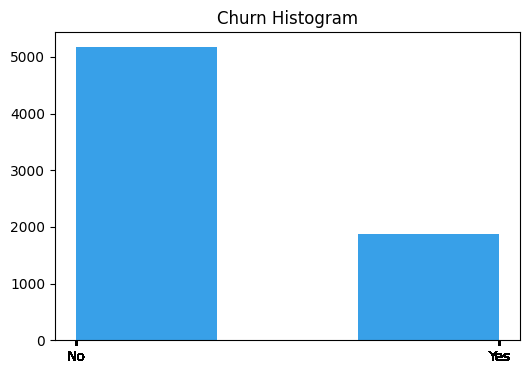

In [7]:
churn_counts = df['Churn'].value_counts()
x_churn = (churn_counts.iloc[1]/(churn_counts.iloc[1]+churn_counts.iloc[0]))*100
print(f'''
    No Churn: {churn_counts.iloc[0]:,}
    Churn: {churn_counts.iloc[1]:,} ({x_churn:,.1f}%)
''')
plot_histogram('Churn')



Both
    No Churn: 3,249
    Churn: 1,586 (32.8%)
Just Phone
    No Churn: 1,413
    Churn: 170 (10.7%)
Just Internet
    No Churn: 512
    Churn: 113 (18.1%)



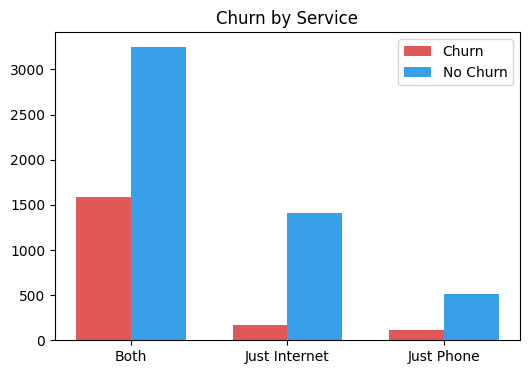

In [8]:
service_counts_no_churn = df[df['Churn'] == 'No']['Service'].value_counts()
service_counts_churn = df[df['Churn'] == 'Yes']['Service'].value_counts()
x_service_both = (service_counts_churn.iloc[0]/(service_counts_no_churn.iloc[0]+service_counts_churn.iloc[0]))*100
x_service_phone = (service_counts_churn.iloc[1]/(service_counts_no_churn.iloc[1]+service_counts_churn.iloc[1]))*100
x_service_internet = (service_counts_churn.iloc[2]/(service_counts_no_churn.iloc[2]+service_counts_churn.iloc[2]))*100
print(f'''
Both
    No Churn: {service_counts_no_churn.iloc[0]:,}
    Churn: {service_counts_churn.iloc[0]:,} ({x_service_both:,.1f}%)
Just Phone
    No Churn: {service_counts_no_churn.iloc[1]:,}
    Churn: {service_counts_churn.iloc[1]:,} ({x_service_phone:,.1f}%)
Just Internet
    No Churn: {service_counts_no_churn.iloc[2]:,}
    Churn: {service_counts_churn.iloc[2]:,} ({x_service_internet:,.1f}%)
''')
plot_bars_2col('Service')



No PhoneService
    No Churn: 512
    Churn: 170 (24.9%)
PhoneService
    No Churn: 4,662
    Churn: 1,699 (26.7%)



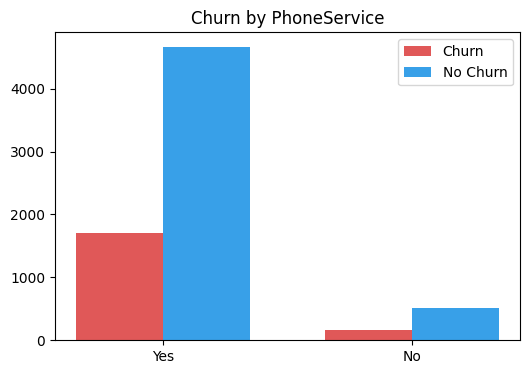

In [17]:
phone_counts_no_churn = df[df['Churn'] == 'No']['PhoneService'].value_counts()
phone_counts_churn = df[df['Churn'] == 'Yes']['PhoneService'].value_counts()
x_phone_no = (phone_counts_churn.iloc[1]/(phone_counts_no_churn.iloc[1]+phone_counts_churn.iloc[1]))*100
x_phone_yes = (phone_counts_churn.iloc[0]/(phone_counts_no_churn.iloc[0]+phone_counts_churn.iloc[0]))*100
print(f'''
No PhoneService
    No Churn: {phone_counts_no_churn.iloc[1]:,}
    Churn: {phone_counts_churn.iloc[1]:,} ({x_phone_no:,.1f}%)
PhoneService
    No Churn: {phone_counts_no_churn.iloc[0]:,}
    Churn: {phone_counts_churn.iloc[0]:,} ({x_phone_yes:,.1f}%)
''')
plot_bars_2col('PhoneService')


Fiber optic
    No Churn: 1,799
    Churn: 1,297 (41.9%)
DSL
    No Churn: 1,962
    Churn: 459 (19.0%)
--------------------------
Fiber + DSL
    No Churn: 3,761
    Churn: 1,756 (31.8%)   
   
No
    No Churn: 1,413
    Churn: 113 (7.4%)



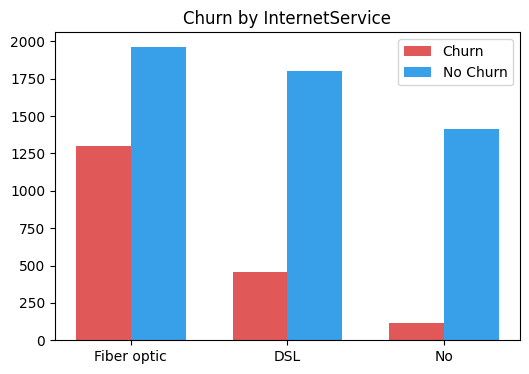

In [29]:
internet_counts_no_churn = df[df['Churn'] == 'No']['InternetService'].value_counts()
internet_counts_churn = df[df['Churn'] == 'Yes']['InternetService'].value_counts()
x_internet_fiber = (internet_counts_churn.iloc[0]/(internet_counts_no_churn.iloc[1]+internet_counts_churn.iloc[0]))*100
x_internet_dsl = (internet_counts_churn.iloc[1]/(internet_counts_no_churn.iloc[0]+internet_counts_churn.iloc[1]))*100
x_internet_internet = ((internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1])/((internet_counts_no_churn.iloc[1]+internet_counts_no_churn.iloc[0])+(internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1])))*100
x_internet_no = (internet_counts_churn.iloc[2]/(internet_counts_no_churn.iloc[2]+internet_counts_churn.iloc[2]))*100
print(f'''
Fiber optic
    No Churn: {internet_counts_no_churn.iloc[1]:,}
    Churn: {internet_counts_churn.iloc[0]:,} ({x_internet_fiber:,.1f}%)
DSL
    No Churn: {internet_counts_no_churn.iloc[0]:,}
    Churn: {internet_counts_churn.iloc[1]:,} ({x_internet_dsl:,.1f}%)
--------------------------
Fiber + DSL
    No Churn: {internet_counts_no_churn.iloc[1]+internet_counts_no_churn.iloc[0]:,}
    Churn: {internet_counts_churn.iloc[0]+internet_counts_churn.iloc[1]:,} ({x_internet_internet:,.1f}%)   
   
No
    No Churn: {internet_counts_no_churn.iloc[2]:,}
    Churn: {internet_counts_churn.iloc[2]:,} ({x_internet_no:,.1f}%)
''')
plot_bars_2col('InternetService')


No OnlineService
    No Churn: 2,551
    Churn: 1,170 (31.4%)
OnlineService
    No Churn: 2,623
    Churn: 699 (21.0%)



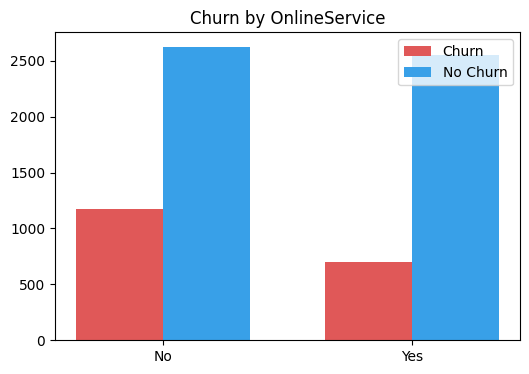

In [43]:
online_counts_no_churn = df[df['Churn'] == 'No']['OnlineService'].value_counts()
online_counts_churn = df[df['Churn'] == 'Yes']['OnlineService'].value_counts()
x_online_no = (online_counts_churn.iloc[0]/(online_counts_no_churn.iloc[1]+online_counts_churn.iloc[0]))*100
x_online_yes = (online_counts_churn.iloc[1]/(online_counts_no_churn.iloc[0]+online_counts_churn.iloc[1]))*100
print(f'''
No OnlineService
    No Churn: {online_counts_no_churn.iloc[1]:,}
    Churn: {online_counts_churn.iloc[0]:,} ({x_online_no:,.1f}%)
OnlineService
    No Churn: {online_counts_no_churn.iloc[0]:,}
    Churn: {online_counts_churn.iloc[1]:,} ({x_online_yes:,.1f}%)
''')
plot_bars_2col('OnlineService')


No SecurityHelp
    No Churn: 2,625
    Churn: 1,161 (30.7%)
SecurityHelp
    No Churn: 2,549
    Churn: 708 (21.7%)



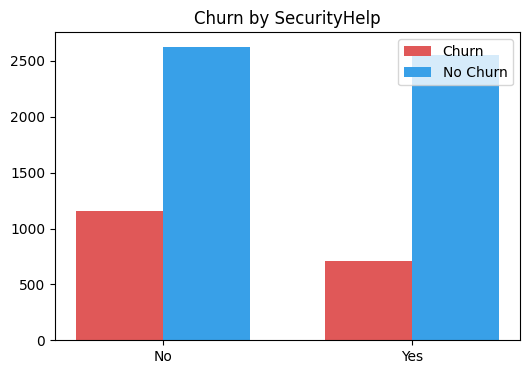

In [44]:
sech_counts_no_churn = df[df['Churn'] == 'No']['SecurityHelp'].value_counts()
sech_counts_churn = df[df['Churn'] == 'Yes']['SecurityHelp'].value_counts()
x_sech_no = (sech_counts_churn.iloc[0]/(sech_counts_no_churn.iloc[0]+sech_counts_churn.iloc[0]))*100
x_sech_yes = (sech_counts_churn.iloc[1]/(sech_counts_no_churn.iloc[1]+sech_counts_churn.iloc[1]))*100
print(f'''
No SecurityHelp
    No Churn: {sech_counts_no_churn.iloc[0]:,}
    Churn: {sech_counts_churn.iloc[0]:,} ({x_sech_no:,.1f}%)
SecurityHelp
    No Churn: {sech_counts_no_churn.iloc[1]:,}
    Churn: {sech_counts_churn.iloc[1]:,} ({x_sech_yes:,.1f}%)
''')
plot_bars_2col('SecurityHelp')


No Streaming
    No Churn: 2,736
    Churn: 808 (22.8%)
Streaming
    No Churn: 2,438
    Churn: 1,061 (30.3%)



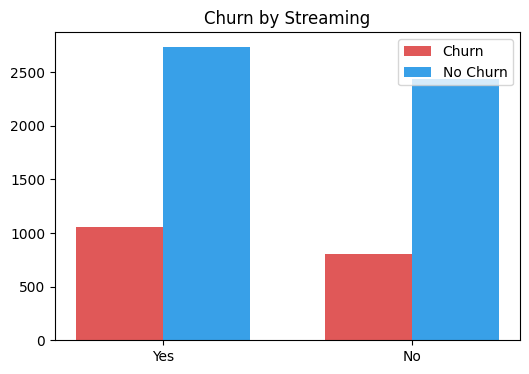

In [45]:
str_counts_no_churn = df[df['Churn'] == 'No']['Streaming'].value_counts()
str_counts_churn = df[df['Churn'] == 'Yes']['Streaming'].value_counts()
x_str_no = (str_counts_churn.iloc[1]/(str_counts_no_churn.iloc[0]+str_counts_churn.iloc[1]))*100
x_str_yes = (str_counts_churn.iloc[0]/(str_counts_no_churn.iloc[1]+str_counts_churn.iloc[0]))*100
print(f'''
No Streaming
    No Churn: {str_counts_no_churn.iloc[0]:,}
    Churn: {str_counts_churn.iloc[1]:,} ({x_str_no:,.1f}%)
Streaming
    No Churn: {str_counts_no_churn.iloc[1]:,}
    Churn: {str_counts_churn.iloc[0]:,} ({x_str_yes:,.1f}%)
''')
plot_bars_2col('Streaming')


Female
    No Churn: 2,625
    Churn: 939 (26.3%)
Male
    No Churn: 2,549
    Churn: 930 (26.7%)



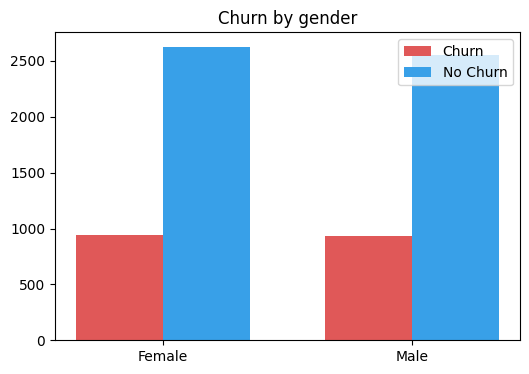

In [9]:
gender_counts_no_churn = df[df['Churn'] == 'No']['gender'].value_counts()
gender_counts_churn = df[df['Churn'] == 'Yes']['gender'].value_counts()
x_gender_female = (gender_counts_churn.iloc[0]/(gender_counts_no_churn.iloc[0]+gender_counts_churn.iloc[0]))*100
x_gender_male = (gender_counts_churn.iloc[1]/(gender_counts_no_churn.iloc[1]+gender_counts_churn.iloc[1]))*100
print(f'''
Female
    No Churn: {gender_counts_no_churn.iloc[0]:,}
    Churn: {gender_counts_churn.iloc[0]:,} ({x_gender_female:,.1f}%)
Male
    No Churn: {gender_counts_no_churn.iloc[1]:,}
    Churn: {gender_counts_churn.iloc[1]:,} ({x_gender_male:,.1f}%)
''')
plot_bars_2col('gender')


No Senior Citizen
    No Churn: 2,625
    Churn: 939 (26.3%)
Senior Citizen
    No Churn: 2,549
    Churn: 930 (26.7%)



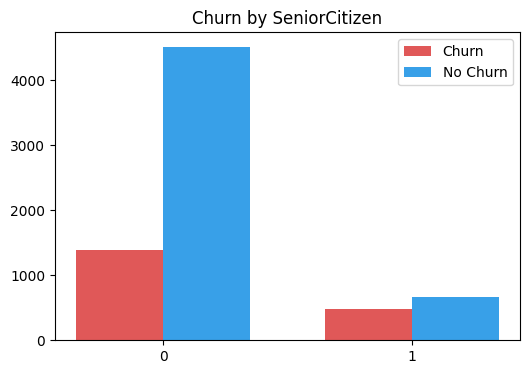

In [10]:
seniorcit_counts_no_churn = df[df['Churn'] == 'No']['SeniorCitizen'].value_counts()
seniorcit_counts_churn = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()
x_seniorcit_no = (seniorcit_counts_churn.iloc[0]/(seniorcit_counts_no_churn.iloc[0]+seniorcit_counts_churn.iloc[1]))*100
x_seniorcit_yes = (seniorcit_counts_churn.iloc[1]/(seniorcit_counts_no_churn.iloc[0]+seniorcit_counts_churn.iloc[1]))*100
print(f'''
No Senior Citizen
    No Churn: {gender_counts_no_churn.iloc[0]:,}
    Churn: {gender_counts_churn.iloc[0]:,} ({x_gender_female:,.1f}%)
Senior Citizen
    No Churn: {gender_counts_no_churn.iloc[1]:,}
    Churn: {gender_counts_churn.iloc[1]:,} ({x_gender_male:,.1f}%)
''')
plot_bars_2col('SeniorCitizen')


No Partner
    No Churn: 2,441
    Churn: 1,200 (33.0%)
Partner
    No Churn: 2,733
    Churn: 669 (19.7%)



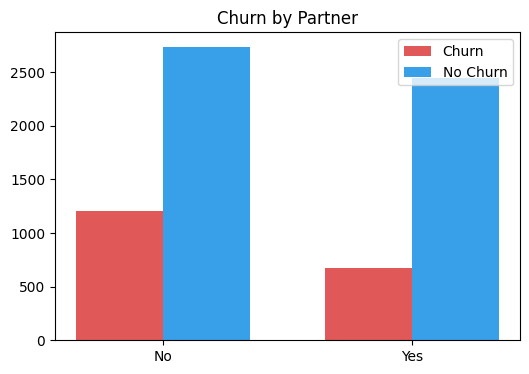

In [11]:
partner_counts_no_churn = df[df['Churn'] == 'No']['Partner'].value_counts()
partner_counts_churn = df[df['Churn'] == 'Yes']['Partner'].value_counts()
x_partner_no = (partner_counts_churn.iloc[0]/(partner_counts_no_churn.iloc[1]+partner_counts_churn.iloc[0]))*100
x_partner_yes = (partner_counts_churn.iloc[1]/(partner_counts_no_churn.iloc[0]+partner_counts_churn.iloc[1]))*100
print(f'''
No Partner
    No Churn: {partner_counts_no_churn.iloc[1]:,}
    Churn: {partner_counts_churn.iloc[0]:,} ({x_partner_no:,.1f}%)
Partner
    No Churn: {partner_counts_no_churn.iloc[0]:,}
    Churn: {partner_counts_churn.iloc[1]:,} ({x_partner_yes:,.1f}%)
''')
plot_bars_2col('Partner')


No Dependents
    No Churn: 3,390
    Churn: 1,543 (31.3%)
Dependents
    No Churn: 1,784
    Churn: 326 (15.5%)



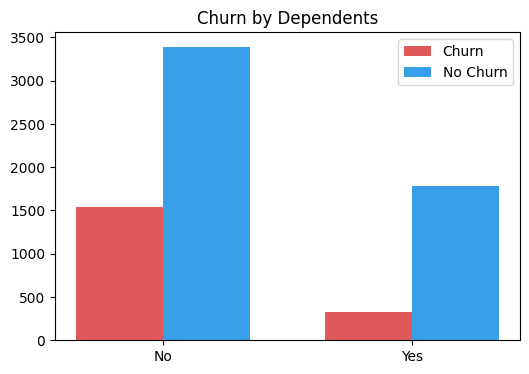

In [15]:
dependents_counts_no_churn = df[df['Churn'] == 'No']['Dependents'].value_counts()
dependents_counts_churn = df[df['Churn'] == 'Yes']['Dependents'].value_counts()
x_dependents_no = (dependents_counts_churn.iloc[0]/(dependents_counts_no_churn.iloc[0]+dependents_counts_churn.iloc[0]))*100
x_dependents_yes = (dependents_counts_churn.iloc[1]/(dependents_counts_no_churn.iloc[1]+dependents_counts_churn.iloc[1]))*100
print(f'''
No Dependents
    No Churn: {dependents_counts_no_churn.iloc[0]:,}
    Churn: {dependents_counts_churn.iloc[0]:,} ({x_dependents_no:,.1f}%)
Dependents
    No Churn: {dependents_counts_no_churn.iloc[1]:,}
    Churn: {dependents_counts_churn.iloc[1]:,} ({x_dependents_yes:,.1f}%)
''')
plot_bars_2col('Dependents')


Month-to-month
    No Churn: 2,220
    Churn: 1,655 (42.7%)
One year
    No Churn: 1,307
    Churn: 166 (11.3%)
Two year
    No Churn: 1,647
    Churn: 48 (2.8%)



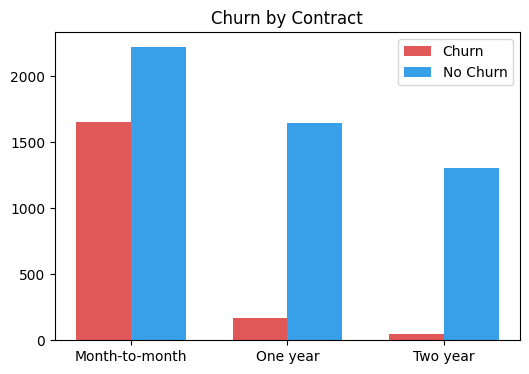

In [50]:
contract_counts_no_churn = df[df['Churn'] == 'No']['Contract'].value_counts()
contract_counts_churn = df[df['Churn'] == 'Yes']['Contract'].value_counts()
x_contract_monthly = (contract_counts_churn.iloc[0]/(contract_counts_no_churn.iloc[0]+contract_counts_churn.iloc[0]))*100
x_contract_one = (contract_counts_churn.iloc[1]/(contract_counts_no_churn.iloc[2]+contract_counts_churn.iloc[1]))*100
x_contract_two = (contract_counts_churn.iloc[2]/(contract_counts_no_churn.iloc[1]+contract_counts_churn.iloc[2]))*100
print(f'''
Month-to-month
    No Churn: {contract_counts_no_churn.iloc[0]:,}
    Churn: {contract_counts_churn.iloc[0]:,} ({x_contract_monthly:,.1f}%)
One year
    No Churn: {contract_counts_no_churn.iloc[2]:,}
    Churn: {contract_counts_churn.iloc[1]:,} ({x_contract_one:,.1f}%)
Two year
    No Churn: {contract_counts_no_churn.iloc[1]:,}
    Churn: {contract_counts_churn.iloc[2]:,} ({x_contract_two:,.1f}%)
''')
plot_bars_2col('Contract')


PaperlessBilling
    No Churn: 2,771
    Churn: 1,400 (33.6%)
No PaperlessBilling
    No Churn: 2,403
    Churn: 469 (16.3%)



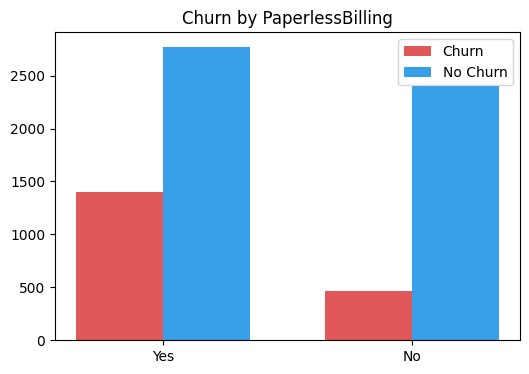

In [ ]:
paper_counts_no_churn = df[df['Churn'] == 'No']['PaperlessBilling'].value_counts()
paper_counts_churn = df[df['Churn'] == 'Yes']['PaperlessBilling'].value_counts()
x_paper_yes = (paper_counts_churn.iloc[0]/(paper_counts_no_churn.iloc[0]+paper_counts_churn.iloc[0]))*100
x_paper_no = (paper_counts_churn.iloc[1]/(paper_counts_no_churn.iloc[1]+paper_counts_churn.iloc[1]))*100
print(f'''
PaperlessBilling
    No Churn: {paper_counts_no_churn.iloc[0]:,}
    Churn: {paper_counts_churn.iloc[0]:,} ({x_paper_yes:,.1f}%)
No PaperlessBilling
    No Churn: {paper_counts_no_churn.iloc[1]:,}
    Churn: {paper_counts_churn.iloc[1]:,} ({x_paper_no:,.1f}%)
''')
plot_bars_2col('PaperlessBilling')


Electronic check
    No Churn: 1,294
    Churn: 1,071 (45.3%)
Mailed check
    No Churn: 1,304
    Churn: 308 (19.1%)
Bank transfer (automatic)
    No Churn: 1,286
    Churn: 258 (16.7%)
Credit card (automatic)
    No Churn: 1,290
    Churn: 232 (15.2%)



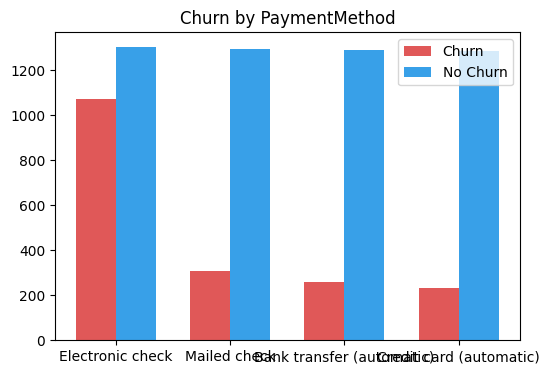

In [65]:
pay_counts_no_churn = df[df['Churn'] == 'No']['PaymentMethod'].value_counts()
pay_counts_churn = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
x_pay_elec = (pay_counts_churn.iloc[0]/(pay_counts_no_churn.iloc[1]+pay_counts_churn.iloc[0]))*100
x_pay_mail = (pay_counts_churn.iloc[1]/(pay_counts_no_churn.iloc[0]+pay_counts_churn.iloc[1]))*100
x_pay_bank = (pay_counts_churn.iloc[2]/(pay_counts_no_churn.iloc[3]+pay_counts_churn.iloc[2]))*100
x_pay_card = (pay_counts_churn.iloc[3]/(pay_counts_no_churn.iloc[2]+pay_counts_churn.iloc[3]))*100
print(f'''
Electronic check
    No Churn: {pay_counts_no_churn.iloc[1]:,}
    Churn: {pay_counts_churn.iloc[0]:,} ({x_pay_elec:,.1f}%)
Mailed check
    No Churn: {pay_counts_no_churn.iloc[0]:,}
    Churn: {pay_counts_churn.iloc[1]:,} ({x_pay_mail:,.1f}%)
Bank transfer (automatic)
    No Churn: {pay_counts_no_churn.iloc[3]:,}
    Churn: {pay_counts_churn.iloc[2]:,} ({x_pay_bank:,.1f}%)
Credit card (automatic)
    No Churn: {pay_counts_no_churn.iloc[2]:,}
    Churn: {pay_counts_churn.iloc[3]:,} ({x_pay_card:,.1f}%)
''')
plot_bars_2col('PaymentMethod')

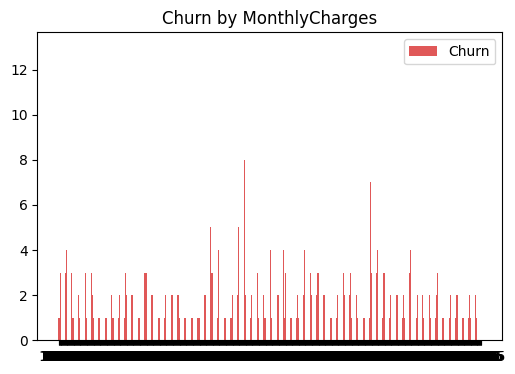

In [67]:
plot_bars_1col('MonthlyCharges')

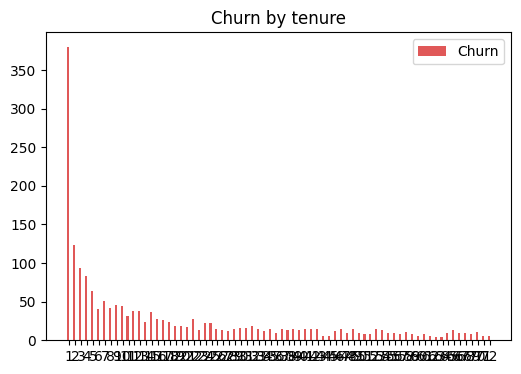

In [68]:
plot_bars_1col('tenure')